In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering.IntervalKMeans import IntervalKMeans
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization.Interval2d import Interval2d
from interClusLib.visualization.Interval3d import Interval3d
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates

print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0          0.693303        39.612070        50.591282        85.210911   
1         50.449145        98.638012        31.777960        64.073951   
2         10.619535        27.670957        40.996769        79.062040   
3         19.813054        20.441325         0.275234        87.457268   
4         29.736515        52.109382        13.721853        45.437289   
5          9.800442        56.846601         1.944703        47.930403   
6         29.788201        88.390108        13.645746        37.520413   
7         64.109771        70.325096        36.166467        66.001697   
8         55.982220        71.510408        79.671481        81.771443   
9         17.565456        60.899713        55.068067        99.733129   
10         8.632217        15.115745         1.831994        41.293

In [3]:
print(type(random_data))      
print(type(random_data.data))  
print(random_data.data.shape)  
print(random_data.get_intervals().shape[0])

<class 'interClusLib.IntervalData.IntervalData'>
<class 'pandas.core.frame.DataFrame'>
(30, 6)
30


30
[[1.00000000e+00 1.44012719e-01 4.48185911e-01 1.86506486e-01
  6.40237781e-02 3.74676391e-01 3.73402768e-02 1.04737759e-01
  2.62432799e-01 3.26522756e-01 5.55304353e-02 4.85287769e-01
  3.60447543e-01 1.07172673e-01 1.35795026e-01 6.86391553e-02
  7.15783067e-01 3.32785177e-01 3.20634153e-01 2.32483972e-01
  4.09260731e-02 1.45416937e-01 4.72619686e-01 4.66398451e-01
  2.45247602e-01 1.65249022e-01 1.56226521e-01 2.52548861e-01
  3.41248785e-01 2.53015135e-01]
 [1.44012719e-01 1.00000000e+00 3.53656719e-01 3.07907032e-01
  1.09797555e-01 2.20300236e-01 2.51660137e-01 5.19476458e-01
  1.66356096e-01 1.44970124e-01 1.37180582e-01 3.07842090e-01
  3.90939615e-01 7.74150126e-02 2.49602971e-01 2.66778565e-01
  1.71623338e-01 3.03357423e-01 3.28018960e-01 1.25613429e-01
  2.89995567e-01 4.62692929e-01 4.18142456e-01 4.41639286e-01
  5.14018729e-01 2.53331234e-01 2.38477980e-01 7.19117767e-02
  2.20781627e-01 3.52898282e-01]
 [4.48185911e-01 3.53656719e-01 1.00000000e+00 4.15726844e-01
 

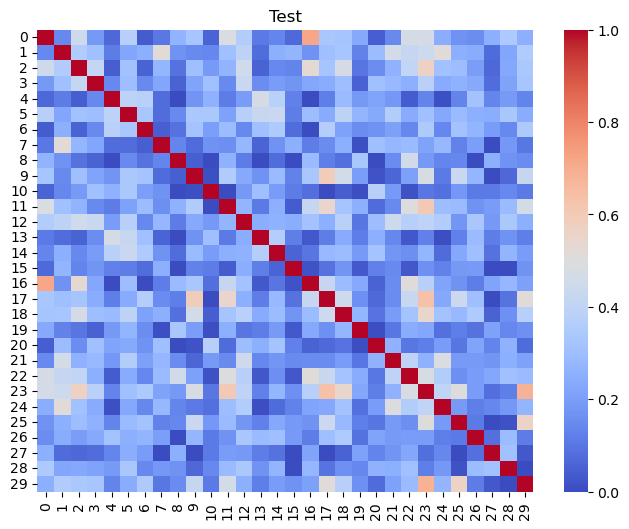

In [4]:
print(random_data.get_intervals().shape[0])

from interClusLib.metric import *
distance_matrix = pairwise_similarity(random_data.get_intervals(),"jaccard")

print(distance_matrix)

plt.figure(figsize=(8, 6))
HeatMap.draw_heat_map(distance_matrix, ax = None ,cmap = 'coolwarm', annot=False, cbar=True)
plt.title("Test")
plt.show()

In [5]:
model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

print(model.labels_)

[3 0 3 3 1 3 0 0 2 2 1 2 3 1 1 1 3 2 3 0 0 0 2 2 0 2 3 0 3 2]


<Figure size 1000x600 with 0 Axes>

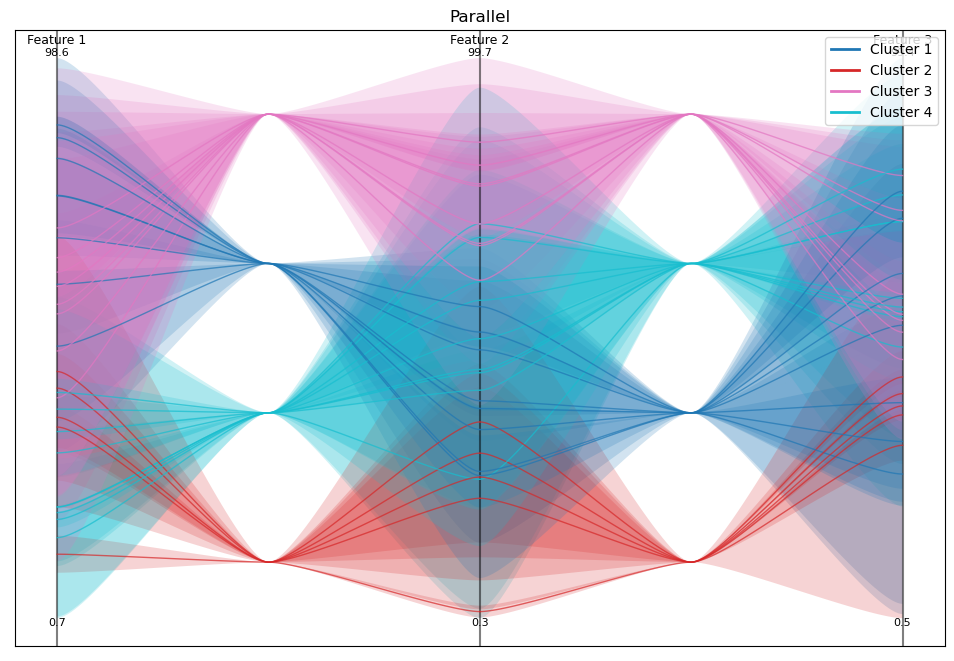

In [7]:
plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.labels_, beta = 1)
plt.title("Parallel")
plt.show()

In [ ]:
def plot_intervals_3D(intervals, labels=None):
    fig= plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111,projection='3d')
    Interval3d.draw_3d_interval_cubes(ax, intervals, labels)

    xs = intervals[:, 0, :].ravel()  # x_lower, x_upper
    ys = intervals[:, 1, :].ravel()  # y_lower, y_upper
    zs = intervals[:, 2, :].ravel()  # z_lower, z_upper

    x_min, x_max = xs.min() - 5, xs.max() + 5
    y_min, y_max = ys.min() - 5, ys.max() + 5
    z_min, z_max = zs.min() - 5, zs.max() + 5

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("x3")
    ax.set_title("3D")

    plt.show()

def plot_intervals_as_squares(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6,6))
    Interval2d.draw_interval_squares(ax, intervals, labels)

    min_val = intervals.min() - 1
    max_val = intervals.max() + 1
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("Coordinate X (lower →)")
    ax.set_ylabel("Coordinate Y (lower →)")
    ax.set_title("1D Intervals as Squares")
    plt.show()

def plot_2d_intervals(intervals, labels=None):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    Interval2d.draw_interval_rectangles(ax, intervals, labels=labels)
    
    # 根据 intervals 范围调整坐标
    x_vals = intervals[:, 0, :].ravel()  # 所有 x_lower, x_upper
    y_vals = intervals[:, 1, :].ravel()  # 所有 y_lower, y_upper
    x_min, x_max = x_vals.min() - 1, x_vals.max() + 1
    y_min, y_max = y_vals.min() - 1, y_vals.max() + 1
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # 让坐标系的 x,y 单位看起来相等
    ax.set_aspect('equal', 'box')
    
    ax.set_xlabel("X dimension")
    ax.set_ylabel("Y dimension")
    ax.set_title("2D Interval Rectangles")
    plt.show()


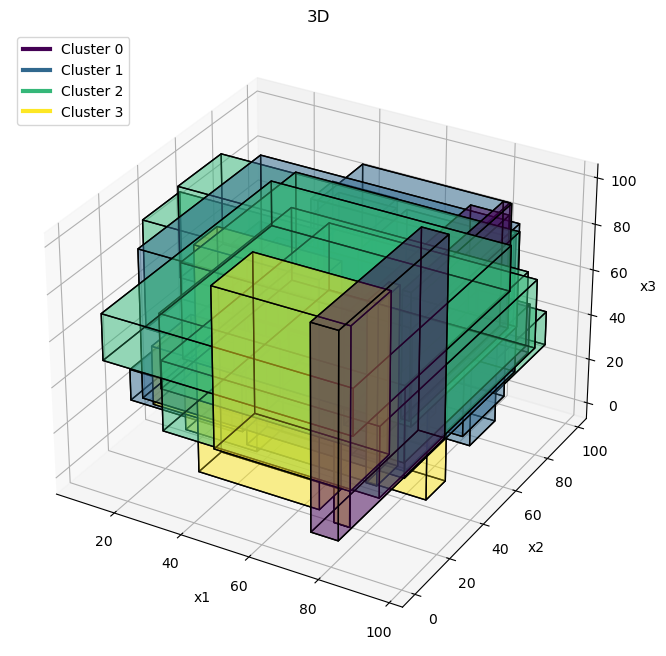

In [ ]:
plot_intervals_3D(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper
0         32.210987        91.815668
1         49.412040        63.500029
2         12.783567        90.588941
3         41.563512        76.595222
4         28.048712        33.137457
5          1.564812        97.764508
6         28.146813        49.703962
7         34.403214        63.785646
8         75.671895        83.080874
9          0.146472        85.367810
10        14.095779        18.897098
11         3.433146        38.797409
12        14.973709        67.422453
13        13.430915        66.147541
14        95.764293        97.086579
15        80.651750        96.240972
16        41.748192        92.930716
17        29.480078        48.527912
18        45.249071        95.400518
19         7.766142        53.582756
20        68.330262        91.471502
21        10.795943        57.452953
22        56.408264        78.952538
23         8.545016        74.183361
24        29.938806        88.123627
25        39.4

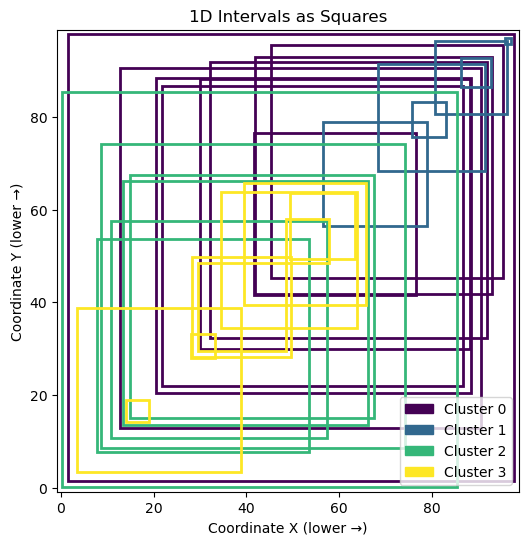

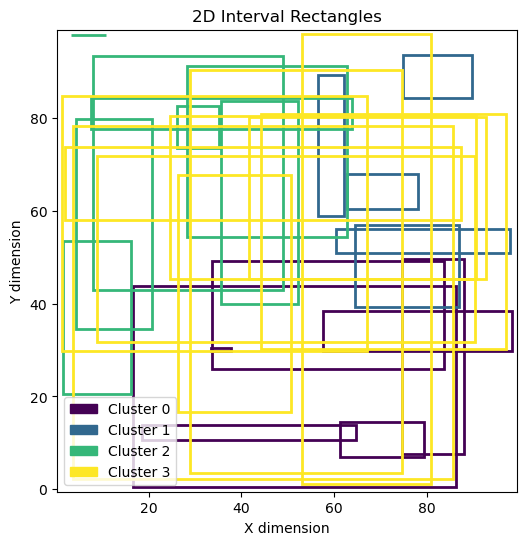

In [ ]:
random_data = IntervalData.random_data(30, 1)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_intervals_as_squares(random_data.get_intervals(), model.labels_)

random_data = IntervalData.random_data(30, 2)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)


 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper
0          3.970669        81.649525        14.747610        44.591862
1         66.024250        98.562289         2.875622        97.032643
2          5.306076        16.212090        14.700810        82.957525
3         72.622532        93.476024        28.090970        70.541321
4         44.724303        69.172789        13.069481        22.135124
5         57.822854        93.037582         5.357270        76.356814
6          7.400111        43.026011        11.344784        54.884911
7         19.238743        49.982325         1.101506        69.124662
8         45.150168        83.635254        21.971094        31.434117
9         26.654248        81.494393        54.768494        77.786021
10        87.855950        97.821052        10.966301        33.378512
11        77.602489        91.174539         1.069098        37.905691
12         3.182102        30.806450        45.837162

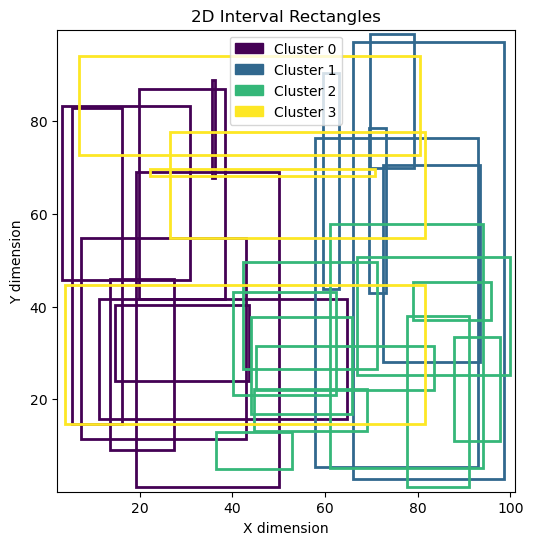

In [ ]:
random_data = IntervalData.random_data(30, 2)
print("\n Random Interval Data:")
print(random_data.data)

model = IntervalKMeans(n_clusters=4,max_iter=20,tol=1e-4,random_state=42)
model.fit(random_data.get_intervals())

plot_2d_intervals(random_data.get_intervals(), model.labels_)